# Flight Fare Prediction

### Reading the Pre-processed dataset for ML

In [1]:
import pandas as pd
import numpy as np

#Reading the pickle file
DataForML=pd.read_pickle('C:/Users/anann/Flight Price Prediction Project/FlightFareDataFinal.pkl')
DataForML.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,1,0,1,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,1,0,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,1,0,1,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


## Splitting the data into Training and Testing sample

In [2]:
# Printing all the column names for our reference
DataForML.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air Asia', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [3]:
# Separate Target Variable and Predictor Variables
TargetVariable='Price'
Predictors=['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air Asia', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi']

X=DataForML[Predictors].values
y=DataForML[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [4]:
X_train[0:4]

array([[ 1,  9,  6, 20,  0, 16, 20, 20, 20,  0,  0,  0,  0,  1,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0],
       [ 1, 27,  5,  5,  5, 12, 10,  7,  5,  0,  0,  0,  1,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 1,  6,  3,  6,  5,  9, 25, 27, 20,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  6,  9, 35, 12, 10,  2, 35,  0,  0,  0,  1,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0]],
      dtype=int64)

## Standardization/Normalization of data


In [5]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7323, 32)
(7323,)
(3139, 32)
(3139,)


In [7]:
X_train[0:4]

array([[0.75      , 0.        , 0.33333333, 0.69565217, 0.81818182,
        1.        , 0.27272727, 0.63829787, 0.54545455, 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.25      , 0.        , 1.        , 0.56521739, 0.        ,
        0.91304348, 0.        , 0.17021277, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.25      , 0.76923077, 0.66666667, 0.60869565, 0.09090909,
        1.        , 0.63636364, 0.19148936, 0.5454

## Decision Trees

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=14,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
R2 Value: 0.9389969201987026

##### Model Validation and Accuracy Calculations ##########
   Price  PredictedPrice
0  17996         14815.0
1   3873          3853.0
2   4462          4128.0
3   2228          3874.0
4   4991          4885.0
Mean Accuracy on test data: 85.38698939071205
Median Accuracy on test data: 91.44314868804665

Accuracy values for 10-fold Cross Validation:
 [86.61334019 86.97324551 84.63951875 87.28315651 87.20013154 86.99496232
 86.51012324 86.4400717  85.24773082 85.78469903]

Final Average Accuracy of the model: 86.37


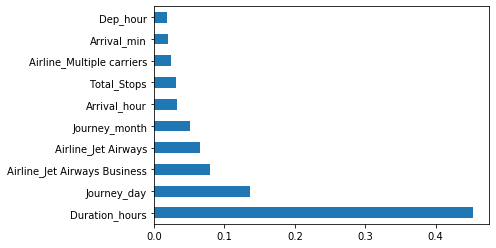

In [10]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=14,criterion='mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

## Random Forest

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
R2 Value: 0.884303288482302

##### Model Validation and Accuracy Calculations ##########
   Price  PredictedPrice
0  17996         15329.0
1   3873          3952.0
2   4462          4788.0
3   2228          4765.0
4   4991          4151.0
Mean Accuracy on test data: 84.52468002237845
Median Accuracy on test data: 88.80466472303208

Accuracy values for 10-fold Cross Validation:
 [85.92493    85.03081041 84.84928177 85.93848829 85.94520248 85.62419058
 84.99197772 84.99657475 85.02401067 84.85999773]



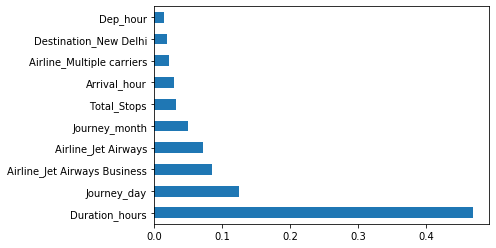

In [17]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=10, n_estimators=100,criterion='mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

## AdaBoost

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=6,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
                  

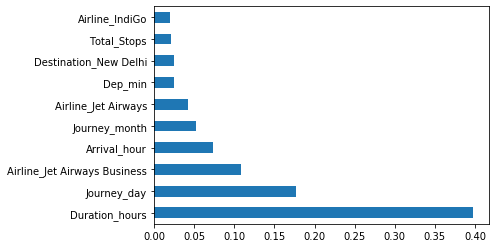

In [22]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 5 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=6)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

## XGBoost

XGBRegressor(base_score=None, booster='gbtree', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=None, max_depth=6,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             objective='reg:squarederror', random_state=None, reg_alpha=None,
             reg_lambda=None, scale_pos_weight=None, subsample=None,
             tree_method=None, validate_parameters=None, verbosity=None)
R2 Value: 0.9248509126484987

##### Model Validation and Accuracy Calculations ##########
   Price  PredictedPrice
0  17996         14494.0
1   3873          3843.0
2   4462          4291.0
3   2228          4413.0
4   4991          4345.0
Mean Accuracy on test data: 86.4029848055669
Median Accuracy on test data: 90.1547432159677

Accuracy value

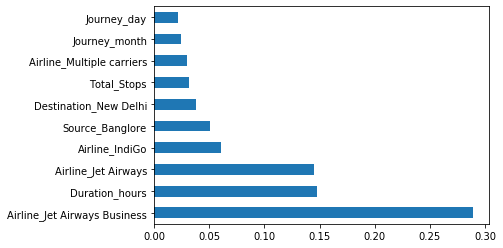

In [25]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=6, 
                      learning_rate=0.1, 
                      n_estimators=200, 
                      objective='reg:squarederror', 
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

## KNN

In [33]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=9)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                    weights='uniform')
R2 Value: 0.7713883850367526

##### Model Validation and Accuracy Calculations ##########
   Price  PredictedPrice
0  17996         16664.0
1   3873          3859.0
2   4462          4629.0
3   2228          4921.0
4   4991          4084.0
Mean Accuracy on test data: 83.12370193106908
Median Accuracy on test data: 88.16047628712536

Accuracy values for 10-fold Cross Validation:
 [84.00604059 83.26095316 83.54154639 84.85095551 84.55269866 83.61342544
 83.23142302 83.46959608 84.22640717 83.1089474 ]

Final Average Accuracy of the model: 83.79


## Choosing an algorithm for final model
Based on the above trials you select that algorithm which produces the best average accuracy. In this case, multiple algorithms have produced similar kind of average accuracy. Hence, we can choose any one of them. 

I am choosing <b>XGBOOST</b> as the final model since it is producing the best accuracy on this data.
In order to deploy the model we follow below steps

1. Train the model using 100% data available
2. Save the model as a serialized file which can be stored anywhere
3. Create a python function which gets integrated with front-end(Tableau/Java Website etc.) to take all the inputs and returns the prediction

## Retraining the model using 100% data

In [34]:
TargetVariable='Price'
Predictors=['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air Asia', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi']

X=DataForML[Predictors].values
y=DataForML[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(10462, 32)
(10462,)


In [35]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Using final hyperparameters
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=6, 
                      learning_rate=0.1, 
                      n_estimators=200, 
                      objective='reg:squarederror', 
                      booster='gbtree')

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [87.41327416 86.79639252 86.48607696 86.93342418 87.64123221 87.36228166
 86.95083395 86.87734382 87.13027207 86.46784195]

Final Average Accuracy of the model: 87.01


In [36]:
# Training the model on 100% Data available
Final_XGB_Model=RegModel.fit(X,y)

## Save the model as a serialized file which can be stored anywhere

In [37]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_XGB_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_XGB_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: C:\Users\anann\Flight Price Prediction Project
